In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

In [25]:
cleaned_satisfaction_df = pd.read_csv("cleaned_satisfaction_data.csv")

In [26]:
cleaned_satisfaction_df

,id,Gender,CustomerType,Age,TravelType,Class,FlightDistance,InflightWifi,FoodAndDrink,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,InflightService,Cleanliness,Satisfaction
0,118319,Female,Loyal Customer,36,Business travel,Business,3347,3,1,1,3,3,3,3,2,neutral or dissatisfied
1,7467,Female,Loyal Customer,45,Business travel,Business,3334,2,4,5,4,4,4,4,5,satisfied
2,68001,Female,Loyal Customer,52,Business travel,Business,3475,2,4,4,4,4,4,4,3,satisfied
3,73302,Male,Loyal Customer,26,Business travel,Business,3960,1,4,4,4,4,2,4,4,satisfied
4,51947,Male,Loyal Customer,45,Business travel,Business,3100,3,1,3,4,4,4,4,1,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8268,98511,Male,Loyal Customer,42,Business travel,Business,3669,4,4,4,4,4,4,4,3,satisfied
8269,127971,Male,Loyal Customer,45,Business travel,Business,3727,4,3,5,5,5,5,5,5,satisfied
8270,53018,Female,Loyal Customer,36,Business travel,Business,3331,3,1,3,3,3,3,3,3,neutral or dissatisfied
8271,46017,Male,Loyal Customer,35,Business travel,Business,3795,5,4,4,2,2,2,2,1,satisfied


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cleaned_satisfaction_df['Gender'] = le.fit_transform(cleaned_satisfaction_df['Gender']) # Female: 0, Male: 1
cleaned_satisfaction_df['CustomerType'] = le.fit_transform(cleaned_satisfaction_df['CustomerType']) #Loyal: 0, Disloyal: 1
cleaned_satisfaction_df['TravelType'] = le.fit_transform(cleaned_satisfaction_df['TravelType']) # Business travel: 0, Personal travel: 1
cleaned_satisfaction_df['Class'] = le.fit_transform(cleaned_satisfaction_df['Class']) # Business: 0, Eco: 1, Other: ?
cleaned_satisfaction_df['Satisfaction'] = le.fit_transform(cleaned_satisfaction_df['Satisfaction']) # Neutral or Dissatisfied: 0, Satisfied: 1

cleaned_satisfaction_df

,id,Gender,CustomerType,Age,TravelType,Class,FlightDistance,InflightWifi,FoodAndDrink,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,InflightService,Cleanliness,Satisfaction
0,118319,0,0,36,0,0,3347,3,1,1,3,3,3,3,2,0
1,7467,0,0,45,0,0,3334,2,4,5,4,4,4,4,5,1
2,68001,0,0,52,0,0,3475,2,4,4,4,4,4,4,3,1
3,73302,1,0,26,0,0,3960,1,4,4,4,4,2,4,4,1
4,51947,1,0,45,0,0,3100,3,1,3,4,4,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8268,98511,1,0,42,0,0,3669,4,4,4,4,4,4,4,3,1
8269,127971,1,0,45,0,0,3727,4,3,5,5,5,5,5,5,1
8270,53018,0,0,36,0,0,3331,3,1,3,3,3,3,3,3,0
8271,46017,1,0,35,0,0,3795,5,4,4,2,2,2,2,1,1


In [28]:
cleaned_satisfaction_df.columns

Index(['id', 'Gender', 'CustomerType', 'Age', 'TravelType', 'Class',
       'FlightDistance', 'InflightWifi', 'FoodAndDrink', 'SeatComfort',
       'InflightEntertainment', 'OnboardService', 'LegRoomService',
       'InflightService', 'Cleanliness', 'Satisfaction'],
      dtype='object')

In [29]:
cleaned_satisfaction_df.corr()

,id,Gender,CustomerType,Age,TravelType,Class,FlightDistance,InflightWifi,FoodAndDrink,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,InflightService,Cleanliness,Satisfaction
id,1.000000,-0.006252,-0.006582,0.053644,-0.007133,-0.011396,0.006269,0.038744,0.043462,0.168101,0.031087,0.069365,0.064082,0.075439,0.111636,0.067829
Gender,-0.006252,1.000000,0.000141,0.002050,-0.014246,-0.021034,-0.018165,0.008489,0.000638,0.001516,0.012780,0.008194,-0.000185,0.009845,-0.003659,-0.002210
CustomerType,-0.006582,0.000141,1.000000,-0.058510,-0.003530,0.116372,0.078245,-0.011580,-0.037050,-0.026963,-0.015826,-0.014211,-0.010929,-0.022960,-0.010784,-0.055443
Age,0.053644,0.002050,-0.058510,1.000000,-0.042516,-0.052632,-0.000456,-0.002145,-0.047619,0.126910,0.057356,0.140578,0.166036,0.044145,0.003227,0.089518
TravelType,-0.007133,-0.014246,-0.003530,-0.042516,1.000000,0.679319,0.155394,-0.014565,-0.047520,-0.048183,-0.023228,-0.039953,-0.004184,-0.054563,-0.021570,-0.113041
Class,-0.011396,-0.021034,0.116372,-0.052632,0.679319,1.000000,0.165801,-0.010415,-0.048269,-0.058872,-0.059009,-0.031717,-0.017689,-0.067679,-0.029457,-0.119253
FlightDistance,0.006269,-0.018165,0.078245,-0.000456,0.155394,0.165801,1.000000,0.008285,-0.014087,-0.018620,-0.000279,-0.000492,0.010726,0.002825,-0.003774,-0.007668
InflightWifi,0.038744,0.008489,-0.011580,-0.002145,-0.014565,-0.010415,0.008285,1.000000,0.081467,0.134236,0.252405,0.192157,0.197827,0.209559,0.113814,0.129167
FoodAndDrink,0.043462,0.000638,-0.037050,-0.047619,-0.047520,-0.048269,-0.014087,0.081467,1.000000,0.316232,0.246995,0.080364,0.067099,0.096388,0.306222,0.263251
SeatComfort,0.168101,0.001516,-0.026963,0.126910,-0.048183,-0.058872,-0.018620,0.134236,0.316232,1.000000,0.403694,0.245662,0.230034,0.235333,0.487449,0.476198


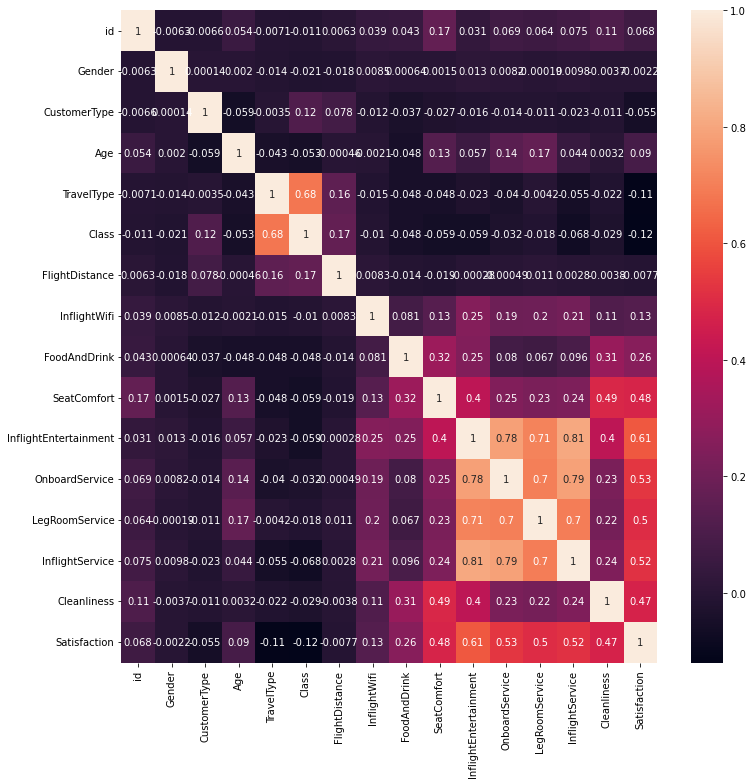

In [30]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(cleaned_satisfaction_df.corr(), annot=True)

In [47]:
# Female: 0, Male: 1
cleaned_satisfaction_df.groupby(['Gender']).mean()

,id,CustomerType,Age,TravelType,Class,FlightDistance,InflightWifi,FoodAndDrink,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,InflightService,Cleanliness,Satisfaction
Gender,,,,,,,,,,,,,,,
0,66091.614606,0.002169,43.455531,0.006749,0.011087,3519.429501,2.731984,3.384189,3.901663,3.766932,3.689323,3.726440,3.776573,3.557966,0.775127
1,65610.743938,0.002182,43.505092,0.004607,0.006547,3508.400824,2.756305,3.385790,3.904947,3.796557,3.709020,3.725994,3.799224,3.549224,0.773278


<AxesSubplot:xlabel='Gender'>

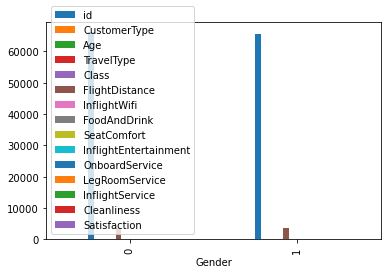

In [48]:
# cols = ['id', 'Gender', 'CustomerType', 'Age', 'TravelType', 'Class']
# gender_df = cleaned_satisfaction_df.groupby(['Gender']).mean().plot.bar()
# gender_df

In [44]:
# g = sns.catplot(
#     data=gender_df, kind="bar",
#     x=cols, hue="Gender",
#     errorbar="sd", palette="dark", alpha=.6, height=6
# )
# g.despine(left=True)
# g.set_axis_labels("", "Ratings")
# g.legend.set_title("")

In [10]:
# X = ['FlightDistance', 'InflightWifi', 'FoodAndDrink', 'SeatComfort',
#        'InflightEntertainment', 'OnboardService', 'LegRoomService',
#        'InflightService', 'Cleanliness']

# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]
  
# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
# plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()

In [11]:
#Loyal: 0, Disloyal: 1

cleaned_satisfaction_df.groupby(['CustomerType']).mean()

,id,Gender,Age,TravelType,Class,FlightDistance,InflightWifi,FoodAndDrink,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,InflightService,Cleanliness,Satisfaction
CustomerType,,,,,,,,,,,,,,,
0,65863.725257,0.498486,43.513265,0.005694,0.008237,3512.822653,2.744882,3.387159,3.904664,3.782556,3.699939,3.726832,3.789098,3.554210,0.775288
1,60431.388889,0.500000,28.333333,0.000000,0.277778,4022.611111,2.388889,2.388889,3.277778,3.388889,3.333333,3.444444,3.222222,3.277778,0.277778


In [12]:
# Business travel: 0, Personal travel: 1
cleaned_satisfaction_df.groupby(['TravelType']).mean()

,id,Gender,CustomerType,Age,Class,FlightDistance,InflightWifi,FoodAndDrink,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,InflightService,Cleanliness,Satisfaction
TravelType,,,,,,,,,,,,,,,
0,65872.639436,0.499027,0.002188,43.519086,0.003282,3510.366035,2.745684,3.389497,3.907245,3.783735,3.702772,3.726599,3.792609,3.555556,0.777778
1,62223.085106,0.404255,0.000000,36.680851,0.978723,4138.021277,2.468085,2.595745,3.212766,3.425532,3.063830,3.659574,2.957447,3.212766,0.148936


In [13]:
# Business: 0, Eco: 1, Others: 2
cleaned_satisfaction_df.groupby(['Class']).mean()

,id,Gender,CustomerType,Age,TravelType,FlightDistance,InflightWifi,FoodAndDrink,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,InflightService,Cleanliness,Satisfaction
Class,,,,,,,,,,,,,,,
0,65880.612396,0.499269,0.001705,43.538724,0.000731,3509.439479,2.745860,3.390891,3.909036,3.787263,3.702752,3.727594,3.794325,3.556746,0.778860
1,64215.448980,0.428571,0.061224,35.469388,0.734694,4102.571429,2.428571,2.510204,3.142857,3.163265,3.183673,3.653061,3.040816,3.142857,0.122449
2,52889.250000,0.250000,0.083333,36.166667,0.416667,4184.583333,2.833333,2.916667,3.083333,2.500000,3.333333,3.083333,2.416667,3.083333,0.250000


In [14]:
# Neutral or Dissatisfied: 0, Satisfied: 1
cleaned_satisfaction_df.groupby(['Satisfaction']).mean()

,id,Gender,CustomerType,Age,TravelType,Class,FlightDistance,InflightWifi,FoodAndDrink,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,InflightService,Cleanliness
Satisfaction,,,,,,,,,,,,,,,
0,61021.864026,0.500535,0.006959,41.476445,0.021413,0.032655,3518.242505,2.401499,2.773019,2.948073,2.476445,2.516060,2.604390,2.686831,2.509636
1,67260.573770,0.497892,0.000781,44.064637,0.001093,0.001874,3512.674629,2.844028,3.563466,4.181889,4.162373,4.044184,4.053396,4.108977,3.858080
